# Imports

In [1]:
import pandas as pd
import numpy as np
import requests
import io

# Utils

In [2]:
def load_dataset(url: str, sep=None, dtype=None, decode=None, sheet=None, verbose: int = 0):
    """
    Load dataset function by request
    --------------------------------

    Parameters
    ----------
    url : str
        Valid url of the dataframe.
    sep : None
        Delimiter to be used.
    dtype : None
        Data type for data or columns.
    decode : None
        decode type.
    sheet : None
        sheet name of the excel file
    verbose :  int = 0
        0 or 1. Verbosity mode. 0 = csv, 1 = xlsx.

    Returns
    -------
    dataframe : pd.core.frame.DataFrame
        Pandas dataframe from the xlsx or csv requested file.
    """
    def requests_csv(url: str, decode: None):
        return (requests.get(url).content).decode(decode)

    if verbose == 0:
        return pd.read_csv(io.StringIO(requests_csv(url, decode)), sep=sep, dtype=dtype)
    elif verbose == 1:
        excel_file = pd.ExcelFile(url)
        return excel_file.parse(sheet)

In [3]:
def lambda_apply_V(df: pd.core.frame.DataFrame, subset: str, v1: int = 1, v2: int = 1, elseV: str = '0'):
    """Apply changes to the requires values using a simple lambda function

    Parameters
    ----------
    df : pd.core.frame.DataFrame
        pandas dataframe target.
    subset :  str
        column target.
    v1, v2 : int
        values to be used in lambda: `df[subset].apply(lambda x: v1 if x == v2 else elseV)`.
    elseV : str
        else value, the dataset will require data type normalization.

    Returns
    -------
    df : pd.core.frame.DataFrame
        Pandas dataframe.
    """
    return df[subset].apply(lambda x: v1 if x == v2 else elseV)    

In [4]:
def lambda_mean_V(df: pd.core.frame.DataFrame, subset: str, subset_target: str, v1=None, v2=None,
                  verbose: int = 0, subset_threshold: str = 'sanz_adj'):
    """Mean value adjusted comparision required using and retrieving `subset_target`.

    Parameters
    ----------
    df : pd.code.frame.DataFrame
        Pandas Dataframe.
    subset : str
        main column
    v1, v2 : None
        Values
    subset_target : str
        target column
    verbose : int
        0 or 1. Verbosity mode. 
        Different requirements using mean function.   

    Returns
    -------
    DataFrame mean value according to the verbosity mode selected.
    """
    if verbose == 0:
        return df[df[subset] == v1][subset_target].mean()
    elif verbose == 1:
        return df[(df[subset] == v1) & (df[subset_target] != v2)][subset_threshold].mean()

# Data Preparation

In [5]:
W04_ex = load_dataset("https://github.com/Y4rd13/ILIAS/blob/main/datasets/W04_Association.xlsx?raw=true", sheet="hst", verbose=1)

In [6]:
VW_data = load_dataset(url="https://media.githubusercontent.com/media/Y4rd13/ILIAS/main/datasets/Volkswohl_Dataset.csv", sep=';', dtype={'hst': str}, decode='utf-8', verbose=0)
VW_data .head()

,Unnamed: 0,bsz,VersNR,Vermittler,von,bis,wkz,sfr,taja,szlj,...,tsn,ezuJJJJ,nutzart,nutzkreis,gar,Wohngeb,PLZHalter,VNGeschle,KZRabSchutz,BeglF
0,0,12,5fbf17e3442744ced0e3ccda244f16bd123a118702ad1f...,1727d2c592180aa82286e77bc3e8fe33811f20cd92e28b...,01.01.2018,31.12.2018,112.0,20,122018.0,0,...,NaN,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,12,f0c503761b7eafc6a7faf07a92714a774ca51fe7bf18fc...,048cc7d1430d3c5ec0380b0221bbffdde775dfbe806cc8...,01.01.2018,31.12.2018,112.0,20,392018.0,0,...,ADE,2017.0,2.0,55.0,1.0,9.0,52078.0,3.0,0.0,0.0
2,2,12,a47e2e3e4353a538542826e69004ef971d23a044070dd9...,d257f91ba3ea3bfff168ab0fc06c0261663c36a4220b33...,01.01.2018,31.12.2018,112.0,20,252018.0,0,...,AZP,2012.0,3.0,0.0,1.0,0.0,63477.0,3.0,0.0,0.0
3,3,12,5d3c3822c07bfe93ede8d473960b6e72f6703f2eec411f...,a2eb70645d686d45dc071c22788e5afa1d4e4b43b26fba...,01.01.2018,31.12.2018,112.0,20,202018.0,0,...,999,2008.0,1.0,55.0,1.0,0.0,35781.0,1.0,0.0,0.0
4,4,12,109237a2a52e5a8be83c68f093f7cb2aeb871c88bf026c...,2ceee4ad20193f2da03bf0c51be2b10eae7c410cdfddb5...,01.01.2018,31.12.2018,112.0,20,252018.0,0,...,999,2009.0,0.0,0.0,0.0,0.0,33428.0,0.0,0.0,0.0


In [7]:
#Create three new dummy columns „KH“, „VK“ and „TK“ containing 0 or 1, if „bsz“ is equal to 11, 12 and 13, respectively
VW_data=VW_data.assign(KH=0)
VW_data=VW_data.assign(VK=0)
VW_data=VW_data.assign(TK=0)
VW_data.loc[VW_data["bsz"] == 11,"KH"] = 1
VW_data.loc[VW_data["bsz"] == 12,"VK"] = 1
VW_data.loc[VW_data["bsz"] == 13,"TK"] = 1

In [8]:
# Convert the column „je“ into data type „float“. You need to replace the comma by a dot beforehand (e.g. „0,83“ to „0.83“)
VW_data['je'] = VW_data["je"].apply(str)
VW_data['je'] = VW_data["je"].apply(lambda x: x.replace(',', '.'))
VW_data['je'] = VW_data["je"].apply(float)
VW_data["je"].unique()

array([1.  , 0.83, 0.75, 0.42, 0.58, 0.33, 0.66, 0.25, 0.5 , 0.91, 0.08,
       0.17, 0.  ,  nan, 0.24])

In [9]:
# Create a new column „sfr_group“ based on column „sfr“ in order to create 9 aggregated bins:
# [1, 20), [20, 30), [30, 40), [40, 50), [50, 60), [60, 70), [70, 80), [80, 90), [90, 110) In this case [30,40) contains all numbers between 30-39
agg_bins = [1, 20, 30, 40, 50, 60, 70, 80, 90, 110]
sfr_val = VW_data["sfr"].copy()
VW_data["sfr_group"] = pd.cut(sfr_val, agg_bins, right=False)

In [10]:
# Create a new column „vngeb_year“ based on „vngeb“ indicating only the year of birth. Replace all missing values by 0
year = list(pd.Series(VW_data["vngeb"].fillna(0).astype(str).values))
for i, v in enumerate(year):
        if (v != "0"):
            year[i]=v.split(".")[2]
        else:
            year[i]="0"

VW_data["vngeb_year"] = pd.Series(year)
VW_data[["vngeb","vngeb_year"]].head()

,vngeb,vngeb_year
0,25.01.1964,1964
1,NaN,0
2,NaN,0
3,05.05.1980,1980
4,25.09.1967,1967


In [11]:
# Replace all values below 1900 in column „fahrgebjahr“ by 0
VW_data["fahrgebjahr"].where(VW_data["fahrgebjahr"] > 1900, 0, inplace=True)
VW_data["fahrgebjahr"].unique()

array([1956.,    0., 1987., 1976., 1964., 1969., 1963., 1988., 1971.,
       1975., 1979., 1980., 1989., 1965., 1968., 1982., 1942., 1958.,
       1990., 1974., 1997., 1947., 1949., 1943., 1981., 1962., 1927.,
       1970., 1961., 1945., 1953., 1973., 1977., 1954., 1985., 1959.,
       1991., 1948., 1940., 1967., 1966., 1960., 1957., 1950., 1946.,
       1952., 1935., 1955., 1993., 1944., 1951., 1939., 1996., 1983.,
       1972., 1992., 1986., 1978., 1934., 1937., 1930., 1936., 1999.,
       1931., 1995., 1941., 1938., 1994., 1933., 1932., 1984., 2000.,
       1998., 1926., 1929., 2001., 1928., 2008., 1925., 1924., 1914.,
       1919., 2014., 1923., 1922.])

In [12]:
# Replace all values below 1900 in column „ezuJJJJ“ by np.nan
VW_data["ezuJJJJ"].where(VW_data["ezuJJJJ"] > 1900, np.nan, inplace=True)

In [13]:
# Create a new column „ezu_group“ based on column „ezuJJJJ“ in order to create 5 aggregated bins: "1950-99","2000-04","2005-09","2010-14","2015-18„
ez_ = VW_data["ezuJJJJ"]
ez_bins = [1950, 2000, 2005, 2010, 2015, 2020]

VW_data["ezu_group"] = pd.cut(ez_, ez_bins, right=False)
VW_data.drop(VW_data.filter(regex="Unnamed"),axis=1, inplace=True) # Unnamed removed
VW_data

,bsz,VersNR,Vermittler,von,bis,wkz,sfr,taja,szlj,sres,...,PLZHalter,VNGeschle,KZRabSchutz,BeglF,KH,VK,TK,sfr_group,vngeb_year,ezu_group
0,12,5fbf17e3442744ced0e3ccda244f16bd123a118702ad1f...,1727d2c592180aa82286e77bc3e8fe33811f20cd92e28b...,01.01.2018,31.12.2018,112.0,20,122018.0,0,2500,...,0.0,0.0,0.0,0.0,0,1,0,"[20.0, 30.0)",1964,"[2000.0, 2005.0)"
1,12,f0c503761b7eafc6a7faf07a92714a774ca51fe7bf18fc...,048cc7d1430d3c5ec0380b0221bbffdde775dfbe806cc8...,01.01.2018,31.12.2018,112.0,20,392018.0,0,0,...,52078.0,3.0,0.0,0.0,0,1,0,"[20.0, 30.0)",0,"[2015.0, 2020.0)"
2,12,a47e2e3e4353a538542826e69004ef971d23a044070dd9...,d257f91ba3ea3bfff168ab0fc06c0261663c36a4220b33...,01.01.2018,31.12.2018,112.0,20,252018.0,0,0,...,63477.0,3.0,0.0,0.0,0,1,0,"[20.0, 30.0)",0,"[2010.0, 2015.0)"
3,12,5d3c3822c07bfe93ede8d473960b6e72f6703f2eec411f...,a2eb70645d686d45dc071c22788e5afa1d4e4b43b26fba...,01.01.2018,31.12.2018,112.0,20,202018.0,0,0,...,35781.0,1.0,0.0,0.0,0,1,0,"[20.0, 30.0)",1980,"[2005.0, 2010.0)"
4,12,109237a2a52e5a8be83c68f093f7cb2aeb871c88bf026c...,2ceee4ad20193f2da03bf0c51be2b10eae7c410cdfddb5...,01.01.2018,31.12.2018,112.0,20,252018.0,0,0,...,33428.0,0.0,0.0,0.0,0,1,0,"[20.0, 30.0)",1967,"[2005.0, 2010.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651681,12,762c753bd091e3e142f88a8080024b0d5444bcd51f6e00...,71beb4a3aefe6928f5f27b3edc4ab469df827572f8f75e...,10.12.2010,23.12.2014,112.0,20,222014.0,4015,0,...,NaN,NaN,NaN,NaN,0,1,0,"[20.0, 30.0)",0,NaN
651682,12,e77e867a81297890c6e8545b60bc631d07dd3bb1aae590...,d032ee4ee49430aaae6e5ef8f8eae7bd2a0380c6f85aa5...,18.01.2012,29.12.2014,112.0,20,242014.0,375,0,...,NaN,NaN,NaN,NaN,0,1,0,"[20.0, 30.0)",0,NaN
651683,12,0dbb6b3719f127e454ae58631b91fc20bd9f85651857ce...,16da84e431140cd481463dc8116b0c8f9d0293b2897611...,17.09.2009,23.12.2014,112.0,74,192014.0,925,0,...,NaN,NaN,NaN,NaN,0,1,0,"[70.0, 80.0)",0,NaN
651684,12,f40a7679aca33dcbfdbb48516b8774850fee823860df48...,631ebaa55324598d6cddc2c35b5cc20e3e45810c9765c5...,25.04.2013,14.11.2014,112.0,20,252014.0,30,0,...,NaN,NaN,NaN,NaN,0,1,0,"[20.0, 30.0)",0,NaN


In [14]:
# In column „nutzart“ replace value 3 by 0
print(VW_data["nutzart"].unique())
VW_data["nutzart"].replace(3, 0, inplace=True)
print(VW_data["nutzart"].unique())

[ 0.  2.  3.  1. nan]
[ 0.  2.  1. nan]


In [15]:
# Create two new dummy columns „Private“ and „Commercial“ containing 0 or 1, if „nutzart“ is equal to 1 and 2, respectively
VW_data["Private"]    = lambda_apply_V(df=VW_data, subset='nutzart', v2=1)
VW_data["Commercial"] = lambda_apply_V(df=VW_data, subset='nutzart', v2=2)
VW_data[['nutzart', "Private", "Commercial"]].head()

,nutzart,Private,Commercial
0,0.0,0,0
1,2.0,0,1
2,0.0,0,0
3,1.0,1,0
4,0.0,0,0


In [16]:
# In column „nutzkreis“ replace all values between 1 and 50 by np.nan
print(VW_data["nutzkreis"].unique())
VW_data["nutzkreis"] = np.where(VW_data['nutzkreis'].between(1,50), np.nan, VW_data['nutzkreis'])
VW_data["nutzkreis"].unique()

[ 0. 55. 52. 51. 54.  1.  3.  9. 16.  7. 11.  5.  8. 17. 31.  4. 19.  2.
 27. 15. 13. 20. 21. nan  6. 12. 23.]


array([ 0., 55., 52., 51., 54., nan])

In [17]:
# Create three new dummy columns „DriverMale“, „DriverFemale“ and „DriverFirm“ containing 0 or 1, if „fahrgeschl“ is equal to 1, 2 and 3, respectively
VW_data["DriverMale"]   = lambda_apply_V(df=VW_data, subset='fahrgeschl', v2=1)
VW_data["DriverFemale"] = lambda_apply_V(df=VW_data, subset='fahrgeschl', v2=2)
VW_data["DriverFirm"]   = lambda_apply_V(df=VW_data, subset='fahrgeschl', v2=3)

VW_data = VW_data.astype(dtype=dict(VW_data.dtypes)) # dtype normalization

In [18]:
# Create a new column „gar_new“ based on „gar“ replacing 0,1 by „Gar_Unknown“, 2 by „Gar_No“ and 3,4,5,6 by „Gar_Yes“
VW_data["gar_new"] = VW_data["gar"].replace([0, 1], "Gar_Unknown").replace(2, "Gar_No").replace([3,4,5,6], "Gar_Yes")
VW_data[['gar',"gar_new"]].head()

,gar,gar_new
0,0.0,Gar_Unknown
1,1.0,Gar_Unknown
2,1.0,Gar_Unknown
3,1.0,Gar_Unknown
4,0.0,Gar_Unknown


In [19]:
# Create a new column „ Wohngeb_new“ based on „ Wohngeb“ replacing 0 by „Property_Unknown“, 1,2,3 by „Property_Yes“ and 9 by „Property_No“
VW_data["Wohngeb_new"] = VW_data["Wohngeb"].replace(0, "Property_Unknown").replace([1, 2, 3], "Property_Yes").replace(9, "Property_No")

In [20]:
# In column „hst“ replace everything that is not a number by np.nan
VW_data["hst"] = pd.to_numeric(VW_data["hst"], errors="coerce")

In [21]:
# Convert „hst“ to numeric data type
pd.to_numeric(VW_data["hst"], errors='ignore')

0         5013.0
1         1844.0
2         3333.0
3         2062.0
4         9999.0
           ...  
651681       NaN
651682       NaN
651683       NaN
651684       NaN
651685       NaN
Name: hst, Length: 651686, dtype: float64

In [22]:
# Use the association provided in file „ W04_Association.xlsx“ to create a new column „hst_group“ based on „hst“ containing 
# the names of the car manufacturers („BMW“, „Audi“, „VW“, ...). Everything that cannot be associated should be called „Other“
W04_ex.set_index('hst', inplace=True)
W04_ex.head()

,Car
hst,
5,BMW
9,Daimler
35,Opel
36,NaN
39,Opel


In [23]:
hst_group = []
for i in VW_data["hst"]:
    if pd.isna(i):
        hst_group.append('Other')
    elif int(i) in list(W04_ex.index):
        hst_group.append(W04_ex.loc[int(i), 'Car'])
    else:
        hst_group.append('Other')

VW_data["hst_group"] = hst_group
VW_data["hst_group"].unique()

array(['Toyota', 'Opel', 'Renault', nan, 'Daimler', 'Chrysler', 'Smart',
       'VW', 'BMW', 'Ford', 'Seat', 'GM', 'Hyundai', 'Saab', 'Citroen',
       'Audi', 'Suzuki', 'Volvo', 'Nissan', 'Fiat', 'Skoda', 'Daihatsu',
       'Peugeot', 'Mazda', 'Honda', 'Kia', 'Mitsubishi', 'Dacia',
       'Porsche', 'Fuji', 'Landrover', 'Jaguar', 'Other'], dtype=object)

In [24]:
# Calculate new columns „sanz_adj“, „vbeitr_adj“, „szlj_adj“, „sres_adj“ and „saufw_adj“ by dividing the respective columns by „je“, 
# e.g. szlj_adj = szlj / je
for i in ['sanz', 'vbeitr', 'szlj', 'sres', 'saufw']:
    VW_data[f'{i}_adj'] = VW_data[i] / VW_data['je']

VW_data.head()

,bsz,VersNR,Vermittler,von,bis,wkz,sfr,taja,szlj,sres,...,DriverFemale,DriverFirm,gar_new,Wohngeb_new,hst_group,sanz_adj,vbeitr_adj,szlj_adj,sres_adj,saufw_adj
0,12,5fbf17e3442744ced0e3ccda244f16bd123a118702ad1f...,1727d2c592180aa82286e77bc3e8fe33811f20cd92e28b...,01.01.2018,31.12.2018,112.0,20,122018.0,0,2500,...,0,0,Gar_Unknown,Property_Unknown,Toyota,1.0,210.0,0.0,2500.0,2275.0
1,12,f0c503761b7eafc6a7faf07a92714a774ca51fe7bf18fc...,048cc7d1430d3c5ec0380b0221bbffdde775dfbe806cc8...,01.01.2018,31.12.2018,112.0,20,392018.0,0,0,...,0,1,Gar_Unknown,Property_No,Opel,0.0,510.0,0.0,0.0,0.0
2,12,a47e2e3e4353a538542826e69004ef971d23a044070dd9...,d257f91ba3ea3bfff168ab0fc06c0261663c36a4220b33...,01.01.2018,31.12.2018,112.0,20,252018.0,0,0,...,0,0,Gar_Unknown,Property_Unknown,Renault,0.0,140.0,0.0,0.0,0.0
3,12,5d3c3822c07bfe93ede8d473960b6e72f6703f2eec411f...,a2eb70645d686d45dc071c22788e5afa1d4e4b43b26fba...,01.01.2018,31.12.2018,112.0,20,202018.0,0,0,...,0,1,Gar_Unknown,Property_Unknown,NaN,0.0,670.0,0.0,0.0,0.0
4,12,109237a2a52e5a8be83c68f093f7cb2aeb871c88bf026c...,2ceee4ad20193f2da03bf0c51be2b10eae7c410cdfddb5...,01.01.2018,31.12.2018,112.0,20,252018.0,0,0,...,0,0,Gar_Unknown,Property_Unknown,NaN,0.0,340.0,0.0,0.0,0.0


# Endresults

In [25]:
#number passanger cars(wkz112)
a1 = len(VW_data[VW_data["wkz"] == 112])
a1

562594

In [26]:
#number motorcycles/scooters (wkz3)
a2 = len(VW_data[VW_data["wkz"] == 3])
a2

39068

In [27]:
#number Trailers factory / private (wkz581)
a3= len(VW_data[VW_data["wkz"] == 581])
a3

13324

<AxesSubplot:>

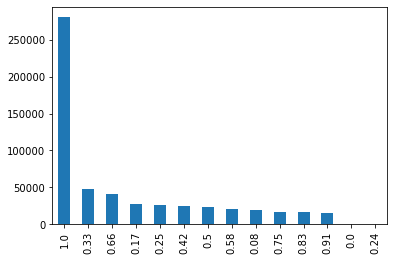

In [28]:
# Plotting wjz112 values
VW_data[VW_data["wkz"] == 112]['je'].value_counts().plot(kind='bar')

In [29]:
#Average number of claims (sanz) per contract per year, Contract term as share of year (je) of 0.9
cars = VW_data[VW_data["wkz"] == 112]
b1 = lambda_mean_V(df=cars, subset='je', v1=.91, subset_target='sanz')
b1

0.08507915122937015

In [30]:
#Average number of claims (sanz) per contract per year, Contract term as share of year (je) of 1.0
b2 = lambda_mean_V(df=cars, subset='je', v1=1.0, subset_target='sanz')
b2

0.06779927301811742

In [31]:
#Average number of adjusted claims (sanz/je) per contract per year for mandatory motor liability (Haftpflicht, bsz=11)
c1 = lambda_mean_V(df=cars, subset='bsz', v1=11, v2=0, subset_target='je', verbose=1)
c1

0.06957108017946388

In [32]:
#Average number of adjusted claims (sanz/je) per contract per year for fully comprehensive insurance (Vollkasko, bsz=12)
c2 = lambda_mean_V(df=cars, subset='bsz', v1=12, v2=0, subset_target='je', verbose=1)
c2

0.14897410956407023

In [33]:
#Average number of adjusted claims (sanz/je) per contract per year cases!!! for partially comprehensive insurance (Teilkasko, bsz=13)
c3 = len(cars[(cars['bsz'] == 13)]['sanz_adj'])
c3

59589

In [34]:
cars_B = cars[cars['je'] == 1]

In [35]:
#Average number of claims (sanz) per contract per year for mandatory motor liability (Haftpflicht, bsz=11)
d1 = lambda_mean_V(df=cars_B, subset='bsz', v1=11, subset_target='sanz')
d1

0.050448773601993714

In [36]:
#Average number of claims (sanz) per contract per year for fully comprehensive insurance (Vollkasko, bsz=12)
d2 = lambda_mean_V(df=cars_B, subset='bsz', v1=12, subset_target='sanz')
d2

0.1079995869996673

In [37]:
#Average number of claims (sanz) per contract per year cases!!! for partially comprehensive insurance (Teilkasko, bsz=13)
d3 = len(cars_B[cars_B['bsz']==13]['sanz'])
d3

31851

In [38]:
cars_B_11 = cars_B[cars_B['bsz'] == 11]

In [39]:
#Average payment per contract, in EUR per year, Premium earned (vbeitr) for male
e1 = lambda_mean_V(df=cars_B_11, subset='fahrgeschl', v1=1, subset_target='vbeitr')
e1

318.4917451730249

In [40]:
#Average payment per contract, in EUR per year, Claims incurred (saufw) for female
e2 = lambda_mean_V(df=cars_B_11, subset='fahrgeschl', v1=2, subset_target='saufw')
e2

210.78231176370156

In [41]:
#Average payment per contract, in EUR per year, Claims paid (szlj) for companies
e3 = lambda_mean_V(df=cars_B_11, subset='fahrgeschl', v1=3, subset_target='szlj')
e3

69.69506430264333

In [42]:
cars_12 = cars[cars['bsz'] == 12]

In [43]:
#Average adjusted payment per contract, in EUR per year, Premium earned (vbeitr/je) for companies
f1 = lambda_mean_V(df=cars_12, subset='fahrgeschl', v1=3, subset_target='vbeitr_adj')
f1

340.2120844254537

In [44]:
#Average adjusted payment per contract, in EUR per year, Claims incurred (saufw/je) for male
f2 = lambda_mean_V(df=cars_12, subset='fahrgeschl', v1=1, v2=0, subset_target='je', subset_threshold='saufw_adj', verbose=1)
f2

391.6169535256922

In [45]:
#Average adjusted payment per contract, in EUR per year, Claims paid (szlj/je) for companies
f3 = lambda_mean_V(df=cars_12, subset='fahrgeschl', v1=3, v2=0, subset_target='je', subset_threshold='szlj_adj', verbose=1)
f3

259.0593717858947

In [46]:
cars_12["sfr_group"] = cars_12["sfr_group"].astype(str)
cars_12["sfr_group"]

<ipython-input-46-3dd2e8bebb1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_12["sfr_group"] = cars_12["sfr_group"].astype(str)


0         [20, 30)
1         [20, 30)
2         [20, 30)
3         [20, 30)
4         [20, 30)
            ...   
651681    [20, 30)
651682    [20, 30)
651683    [70, 80)
651684    [20, 30)
651685         NaN
Name: sfr_group, Length: 168974, dtype: object

In [47]:
#Average adjusted payment per contract, in EUR per year, Claims paid (szlj/je) [20,30)

# Observation: for other of the team members it works putting '[20.0, 30.0)' instead of '[20, 30)'
g1 = cars_12[(cars_12["sfr_group"]=='[20, 30)') & (cars_12['je']!=0)]['szlj_adj'].mean()
g1

373.3372472854312

In [48]:
#Average adjusted payment per contract, in EUR per year, Premium earned (vbeitr/je) [90,110)
g2 = cars_12[(cars_12["sfr_group"]=='[90, 110)') & (cars_12['je']!=0)]['vbeitr_adj'].mean()
g2

213.1067460154662

In [49]:
cars_B_13 = cars_B[cars_B['bsz']==13]

In [50]:
cars_B_13["ezu_group"] = cars_B_13["ezu_group"].astype(str)
cars_B_13["ezu_group"]

<ipython-input-50-cf57e04720bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_B_13["ezu_group"] = cars_B_13["ezu_group"].astype(str)


281       [1950, 2000)
282       [2000, 2005)
283       [1950, 2000)
284       [1950, 2000)
285       [1950, 2000)
              ...     
632659    [2000, 2005)
632662    [2000, 2005)
632663    [1950, 2000)
632666    [2005, 2010)
632667    [1950, 2000)
Name: ezu_group, Length: 31851, dtype: object

In [51]:
#Average payment per contract, in EUR per year, Premium earned (vbeitr) [2015, 2020)
h1 = cars_B_13[cars_B_13["ezu_group"]=='[2015, 2020)']['vbeitr'].mean()
h1

126.75471698113208

In [52]:
#Average payment per contract, in EUR per year, Claims incurred (saufw)[2005, 2010)
h2 = cars_B_13[cars_B_13["ezu_group"]=='[2005, 2010)']['saufw'].mean()
h2

43.57172436640715

In [53]:
#Average payment per contract, in EUR per year, Claims paid (szlj) [2015, 2020)
h3 = cars_B_13[cars_B_13["ezu_group"]=='[2015, 2020)']['szlj'].mean()
h3

55.15094339622642

In [54]:
top_manufacturers = cars["hst_group"].value_counts()[:15]
top_manufacturers.to_frame()

,hst_group
VW,80163
BMW,57113
Opel,43555
Daimler,39754
Ford,30792
Audi,30450
Skoda,17809
Renault,16284
Toyota,14028
Hyundai,11259


In [55]:
cars_12_top15 = cars_12[(cars_12["hst_group"].isin(list(top_manufacturers.index))) & (cars_12['je']!=0)]

In [56]:
top = cars_12_top15[["hst_group", 'sanz_adj']].groupby("hst_group").mean()

In [57]:
top.sort_values('sanz_adj', inplace=True, ascending=False)
top

,sanz_adj
hst_group,
BMW,0.218931
Audi,0.208936
Daimler,0.159125
VW,0.154990
Mazda,0.150986
Seat,0.147104
Skoda,0.142410
Ford,0.135517
Renault,0.123331


In [58]:
#Average number of adjusted claims (sanz/je) per contract per year, hst_group, highest claim brand (0.219)
i1 = list(top.index)[0]
i1

'BMW'

In [59]:
#Average number of adjusted claims (sanz/je) per contract per year, hst_group, lowest claim brand (0.096)
i2 = list(top.index)[-1]
i2

'Fiat'

In [60]:
#Average number of adjusted claims (sanz/je) per contract per year, hst_group, second highest claim 
i3 = list(top.values)[1][0]
i3

0.20893597434152358

In [61]:
#Average number of adjusted claims (sanz/je) per contract per year, hst_group, second lowest claim 
i4 = list(top.values)[-2][0]
i4

0.11234447986870348